# Import Library

In [ ]:
# Data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluators
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load Data

In [ ]:
train_df = pd.read_csv("../data/titanic-train.csv")
test_df = pd.read_csv("../data/titanic-test.csv")
train_df.shape, test_df.shape

((891, 12), (418, 11))

# Exploratory Data Analysis

## Initial Observation

In [ ]:
# Checking the top 10 rows of dataframe
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Checking if the dataset is balanced or imbalanced
train_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
# View summary of datasets
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
# distribution of numerical feature values across the samples
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# distribution of categorical features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# Checking the number of missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Checking the number of missing values in test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**According to initial observation, "Name", "Ticket" and "Passenger Id" features can be removed safely since they mostly have unique values. Also, most of the "Cabin" values are missing so "Cabin" feature will be omitted too.**

## Dependent Variable vs "SibSp" & "Parch" Features


In [ ]:
# Dependent variable Vs "SibSp" & "Parch" features
print(train_df.SibSp.value_counts(), '\n\n', train_df.Parch.value_counts())
print('_'*40)
print(pd.crosstab(train_df.Survived, train_df.SibSp), '\n\n', pd.crosstab(train_df.Survived, train_df.Parch))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
________________________________________
SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0 

 Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


**There is an strong correlation between "Parch" and "SibSp" features for 0, 1 , and 2 values. Hence, we will just consider "Parch" feature in our modeling.**

## Creating the Preprocessing Pipelines

In [ ]:
# Define different features and transformer pipelines
categorical_features = ['Embarked', 'Sex', 'Pclass', 'Parch']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())])

# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical', numerical_transformer, numerical_features)])


# Model, Evaluate, Predict

In [ ]:
# Since the ground truth for the test set is not provided, the training data is splitted to have a test set for evaluation
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((801, 11), (801,), (90, 11), (90,))

## Model Comparison and Cross Validation

In [ ]:
# Put desired classifiers in a dictionary
classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "RBF SVM": SVC(),
    "Linear SVM": SVC(kernel="linear"),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier()
}

# Random seed for reproducible results
np.random.seed(42)

# Define variables for model comparison
model=[]
score=[]
std=[]

# Loop through different classifiers
for name, classifier in classifiers.items():
  # Append classifier to preprocessing pipeline.
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])
  # Fit and score the model
  clf.fit(X_train, y_train)
  # Calculate Cross Validation Score
  scores = cross_val_score(clf, X_train, y_train, cv=5)
  # Append score and std to defined variables
  model.append(f'{name}')
  score.append(round(scores.mean()*100, 2))
  std.append(round(scores.std()*100, 2))

# Model Comparison
models = pd.DataFrame({
    'Model': model,
    'Score': score,
    'Standard Deviation': std})
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score,Standard Deviation
0,RBF SVM,82.02,3.65
1,Random Forest,80.15,1.45
2,Logistic Regression,78.65,3.04
3,Linear SVM,78.65,3.70
4,AdaBoost,78.65,3.26
5,Nearest Neighbors,77.90,2.20
6,Naive Bayes,39.58,1.49


## Hyperparameter Tuning for Best Two Models

In [ ]:
np.random.seed(42)
# Random Forest Classifier - Hyperparameter tuning
clf_RF = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
param_grid_RF = {
    'preprocessor__numerical__imputer__strategy': ['median', 'mean', 'most_frequent'],
    'classifier__n_estimators': [100, 1000],
    'classifier__max_depth': [4, 8, 16],
    'classifier__max_features': ["auto", "sqrt"],
    'classifier__min_samples_split': [2, 4]
}
grid_search_RF = GridSearchCV(clf_RF, param_grid_RF, cv=10);
grid_search_RF.fit(X_train, y_train)


# Support Vector Classifier - Hyperparameter tuning
clf_SVC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
param_grid_SVC = {
    'preprocessor__numerical__imputer__strategy': ['median', 'mean', 'most_frequent'],
    'classifier__C': [0.1, 1, 10, 100, 1000],
    'classifier__gamma': ['scale', 'auto']
}
grid_search_SVC = GridSearchCV(clf_SVC, param_grid_SVC, cv=10);
grid_search_SVC.fit(X_train, y_train)

print('Best Model Parameters:')
print(f"Best Parameters for Random Forest classifier: {grid_search_RF.best_params_}")
print(f"Best Parameters for RBF Support Vector classifier: {grid_search_SVC.best_params_}")
print("")
print('Model Comparison After Fine Tuning:')
print(f"Score percentage for Random Forest classifier: %.2f" %(grid_search_RF.score(X_train, y_train)*100))
print(f"Score percentage for RBF Support Vector classifier: %.2f" %(grid_search_SVC.score(X_train, y_train)*100))

Best Model Parameters:
Best Parameters for Random Forest classifier: {'classifier__max_depth': 8, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 1000, 'preprocessor__numerical__imputer__strategy': 'most_frequent'}
Best Parameters for RBF Support Vector classifier: {'classifier__C': 1, 'classifier__gamma': 'scale', 'preprocessor__numerical__imputer__strategy': 'most_frequent'}

Model Comparison After Fine Tuning:
Score percentage for Random Forest classifier: 91.26
Score percentage for RBF Support Vector classifier: 83.15


## Predict and Evaluate Test Dataset

Since Random Forest classifier gives us the best score on training data, we use it for predicting the test dataset.

In [ ]:
# Prediction for test dataset
y_pred = grid_search_RF.predict(X_test)

# Accuracy on test dataset
accuracy_RF = round(grid_search_RF.score(X_test, y_test)*100, 2)
print(f"Random Forest accuracy on test dataset: {accuracy_RF}%")

Random Forest accuracy on test dataset: 86.67%


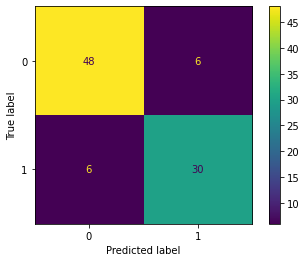

In [ ]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred);

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.83      0.83      0.83        36

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



# Summary

After data exploration on raw data and comparing different classifiers, Random Forest classifier was chosen as the best classifier for prediction of the survival rate in Titanic - Machine Learning problem. An accuracy of about 87% was achieved on test dataset.